In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_colwidth', -1)

In [2]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
sample = pd.read_csv('../data/raw/sample_submission.csv')

In [4]:
train_less100 = train[train['text'].str.len() < 100].copy()
dif1 = test[test['difficulty'] == 1].copy()
dif1_less100 = dif1[dif1['ciphertext'].str.len() <= 100].copy()

In [5]:
def string2ascii(textstring):
    return np.array([ord(char) for char in textstring], dtype=np.int8)

(array([13.,  9.,  6.,  1.,  9.,  8.,  4., 12., 18., 20.]),
 array([ 32.,  41.,  50.,  59.,  68.,  77.,  86.,  95., 104., 113., 122.]),
 <a list of 10 Patch objects>)

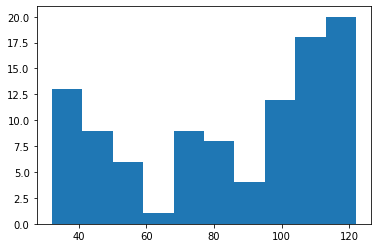

In [8]:
plt.hist(string2ascii(dif1_less100['ciphertext'][0]))

(array([11.,  1.,  0.,  0.,  0.,  0.,  0., 11., 13., 14.]),
 array([ 32. ,  40.9,  49.8,  58.7,  67.6,  76.5,  85.4,  94.3, 103.2,
        112.1, 121. ]),
 <a list of 10 Patch objects>)

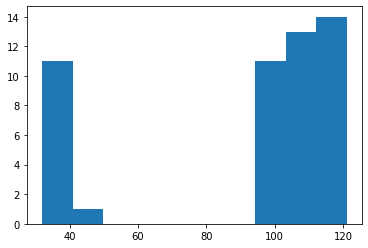

In [10]:
plt.hist(string2ascii(train_less100['text'][0]))

In [11]:
# add new column to both train and test - ascii char
# then add another 256 columns to both train and test 
train_less100['ascii'] = train_less100['text'].apply(string2ascii)
dif1_less100['ascii'] = dif1_less100['ciphertext'].apply(string2ascii)

In [13]:
print(train_less100.shape)
print(dif1_less100.shape)

(108600, 4)
(27120, 4)


In [14]:
train_less100.head()

,plaintext_id,text,index,ascii
0,ID_d45641fc3,"come, who you are and what you would are out of my",104199,"[99, 111, 109, 101, 44, 32, 119, 104, 111, 32, 121, 111, 117, 32, 97, 114, 101, 32, 97, 110, 100, 32, 119, 104, 97, 116, 32, 121, 111, 117, 32, 119, 111, 117, 108, 100, 32, 97, 114, 101, 32, 111, 117, 116, 32, 111, 102, 32, 109, 121]"
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081,"[70, 111, 114, 32, 97, 108, 108, 32, 105, 110, 32, 118, 97, 105, 110, 32, 99, 111, 109, 101, 115, 32, 99, 111, 117, 110, 115, 101, 108, 32, 116, 111, 32, 104, 105, 115, 32, 101, 97, 114, 46]"
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234,"[67, 97, 112, 116, 97, 105, 110, 58, 32, 87, 105, 116, 104, 32, 116, 104, 101, 32, 110, 101, 120, 116, 32, 98, 101, 110, 101, 102, 105, 116, 32, 111, 39, 32, 116, 104, 101, 32, 119, 105, 110, 100, 46]"
3,ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,"[83, 109, 101, 108, 108, 115, 32, 119, 111, 111, 105, 110, 103, 108, 121, 32, 104, 101, 114, 101, 58, 32, 110, 111, 32, 106, 117, 116, 116, 121, 44, 32, 102, 114, 105, 101, 122, 101, 44]"
4,ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149,"[80, 79, 82, 84, 73, 65, 58, 32, 87, 104, 105, 99, 104, 32, 100, 105, 100, 32, 105, 110, 99, 111, 114, 112, 111, 114, 97, 116, 101, 32, 97, 110, 100, 32, 109, 97, 107, 101, 32, 117, 115, 32, 111, 110, 101, 44]"


In [16]:
pd.get_dummies(train_less100['ascii'][0])

,32,44,97,99,100,101,102,104,108,109,110,111,114,116,117,119,121
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
